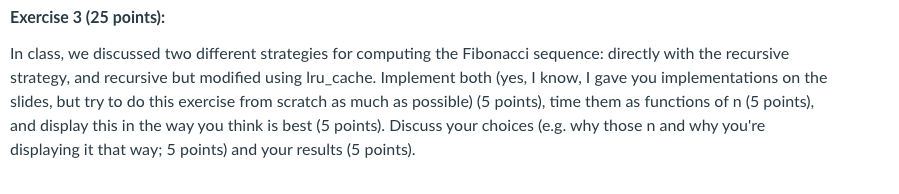

In [28]:
def fib1(n):
    
    if n in (1,2):
        return 1
    return fib1(n-1)+fib1(n-2)

In [9]:
def fib2(n, cache={}):
    if n in (1,2):
        return 1
    if n not in cache:
        cache[n] = fib2(n-1, cache) + fib2(n-2, cache)
    return cache[n]

In [22]:
from functools import lru_cache
@lru_cache()
def fib3(n):
    # preconditions: n an integer >= 1
    if n in (1, 2):
        return 1
    return fib3(n - 1) + fib3(n - 2)

In [51]:
import time
import numpy as np
from tqdm import tqdm
def timeit(function, *args):
    times = []
    for i in range(5):
        start = time.time()
        function(*args)
        times.append(time.time()-start)
    return np.average(times)

ns = range(1, 40)
times1 = [timeit(fib1, n) for n in tqdm(ns)] 
        

100%|██████████| 39/39 [04:56<00:00,  7.59s/it] 


In [47]:
ns = range(1, 1000)
times2 = [timeit(fib3, n) for n in tqdm(ns)] 

100%|██████████| 999/999 [00:00<00:00, 4452.73it/s]


In [17]:
import plotnine as p9
import pandas as pd

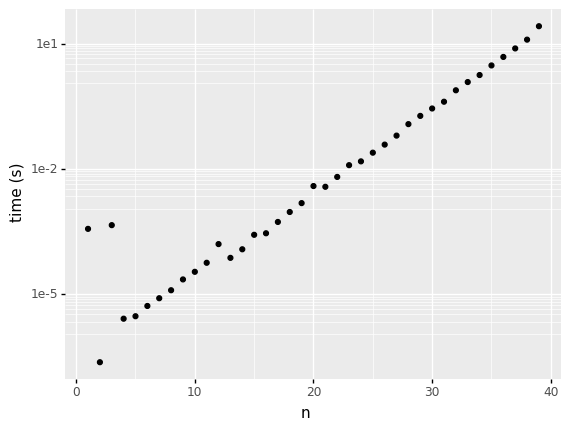

<ggplot: (347727839)>

In [52]:
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times1}), p9.aes(x='n', y='time (s)'))
+ p9.geom_point()
 + p9.scale_x_continuous()
+ p9.scale_y_continuous(trans='log10')
)

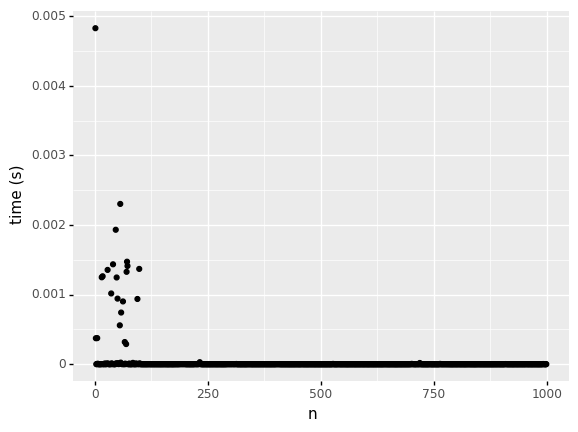

<ggplot: (347542679)>

In [50]:
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times2}), p9.aes(x='n', y='time (s)'))
+ p9.geom_point()
 + p9.scale_x_continuous()
+ p9.scale_y_continuous()
)
